In [1]:
from pathlib import Path
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
import torch.optim as optim
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *
from cmd_classes_funcs_Marchese import MyModel, ImageWithCmdDataset, get_class_labels, get_filenames

/home/CAMPUS/cemb2020/anaconda3/envs/arcslab/lib/python3.8/site-packages/fastbook/__init__.py:18: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


## Use two functions and classes from cmd_classes_funcs_Marchese to make train/valid dataset

In [2]:
# Get classes and filenames
path = Path("data")
classes = get_class_labels(path)
all_filenames = get_filenames(path)

In [3]:
# Getting size of dataset and corresponding list of indices
dataset_size = len(all_filenames)
dataset_indices = list(range(dataset_size))

In [4]:
# Shuffling the indices
np.random.shuffle(dataset_indices)

In [5]:
# Getting index for where we want to split the data
val_split_index = int(np.floor(0.2 * dataset_size))

In [6]:
# Splitting list of indices into training and validation indices
train_idx, val_idx = dataset_indices[val_split_index:], dataset_indices[:val_split_index]

In [7]:
# Getting list of filenames for training and validation set
train_filenames = [all_filenames[i] for i in train_idx]
val_filenames = [all_filenames[i] for i in val_idx]

In [8]:
# Create training and validation datasets
train_data = ImageWithCmdDataset(classes, train_filenames)
val_data = ImageWithCmdDataset(classes, val_filenames)

In [9]:
# Creating DataLoader
dls = DataLoaders.from_dsets(train_data, val_data)
dls = dls.cuda()

In [10]:
net = MyModel()

In [11]:
#learn = cnn_learner(dls, net, n_out = 3, pretrained = False, loss_func=CrossEntropyLossFlat(), metrics=error_rate)
learn = Learner(dls, net, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

In [12]:
# Freeze model to train the head
learn.freeze()

SuggestedLRs(lr_min=0.00043651582673192023, lr_steep=5.248074739938602e-05)

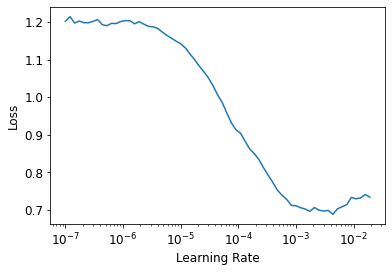

In [13]:
# Find good learning rate
learn.lr_find()

In [14]:
# Train head of model
learn.fit_one_cycle(7, 0.0004)

epoch,train_loss,valid_loss,accuracy,time
0,0.674674,0.675616,0.788546,00:05
1,0.458611,0.696794,0.837004,00:05
2,0.375197,0.370977,0.889868,00:05
3,0.295677,0.340522,0.925110,00:05
4,0.225151,0.226973,0.920705,00:05
5,0.167908,0.232924,0.955947,00:05
6,0.125410,0.236396,0.955947,00:05


In [15]:
# unfreeze to train the whole model
learn.unfreeze()

In [16]:
learn.fit(25, lr=0.0004)

epoch,train_loss,valid_loss,accuracy,time
0,0.188294,0.439819,0.907489,00:05
1,0.168594,0.350763,0.933921,00:05
2,0.164256,0.481231,0.859031,00:05
3,0.145616,0.270214,0.907489,00:05
4,0.117353,0.416967,0.859031,00:05
5,0.096416,0.264368,0.925110,00:05
6,0.087318,0.659951,0.920705,00:05
7,0.077440,0.482443,0.938326,00:05
8,0.065301,0.447496,0.933921,00:05
9,0.059328,0.415144,0.938326,00:05


In [17]:
# maybe try to get a confusion matrix...

In [18]:
learn.export(os.path.abspath('cmd_fai.pkl'))

AttributeError: 'ImageWithCmdDataset' object has no attribute 'new_empty'

In [19]:
PATH = 'cmd_fai.pth'
torch.save(net.state_dict(), PATH)